## <center><u> Correction Intensité</u></center>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import glob
import os
#import SwingTools as st
import swing_toolsV5 as st
import VideoSwingTools as vst
import json
from IPython.display import clear_output

## <u>1 - Correction de Transmission</u>

On trace des courbes d'échantillons SF venant de different Kin pour comparer:
- Les valeurs extraite par foxtrot
- Les valeurs extraites par pyFAI
- Les differentes methodes de correction de transmission






In [2]:
data_folder = 'C:/Users/cayez/Documents/DONNEES_SIMON/LPCNO/Synchrotron/SoleilSWING_octobre24/Notebook_traitement/fichiers_calibration/'
maskfile = 'macro_mask/mask_waxs_eiger_ruiz_oct24.edf'

files_samples =         [
                  data_folder+'h5_samples/rodriguez_01089_2024-10-11_04-33-50.h5',#kin6,
                  data_folder+'h5_samples/rodriguez_02399_2024-10-11_17-10-50.h5',#kin11,
                  data_folder+'h5_samples/rodriguez_05068_2024-10-12_12-17-56.h5',#kin21,
                  data_folder+'h5_samples/rodriguez_05732_2024-10-12_16-28-00.h5',#kin23,
                  data_folder+'h5_samples/rodriguez_09573_2024-10-13_18-07-02.h5',#kin37,
                  data_folder+'h5_samples/rodriguez_10743_2024-10-14_04-01-45.h5',#kin11]
                        ]
files_ref =             [     
                  data_folder+'h5_refs/rodriguez_00908_2024-10-11_03-36-51.h5',#kin6
                  data_folder+'h5_refs/rodriguez_02251_2024-10-11_16-37-25.h5',#kin11
                  data_folder+'h5_refs/rodriguez_04858_2024-10-12_11-27-00.h5',#kin21
                  data_folder+'h5_refs/rodriguez_05565_2024-10-12_15-45-32.h5',#kin23
                  data_folder+'h5_refs/rodriguez_09373_2024-10-13_17-22-04.h5',#kin37
                  data_folder+'h5_refs/rodriguez_10483_2024-10-14_02-58-04.h5',#kin11
                        ]
foxtrot_samples_true =  [
                  data_folder+'foxtrot_sample_normalize_True/01089.txt', #kin6
                  data_folder+'foxtrot_sample_normalize_True/02399.txt',#kin11
                  data_folder+'foxtrot_sample_normalize_True/05068.txt',#kin21
                  data_folder+'foxtrot_sample_normalize_True/05732.txt',#kin23
                  data_folder+'foxtrot_sample_normalize_True/09573.txt',#kin37
                  data_folder+'foxtrot_sample_normalize_True/10743.txt',#ki44
                        ]
foxtrot_samples_false = [  
                  data_folder+'/foxtrot_sample_normalize_False/01089.txt', #kin6
                  data_folder+'/foxtrot_sample_normalize_False/02399.txt',#kin11
                  data_folder+'/foxtrot_sample_normalize_False/05068.txt',#kin21
                  data_folder+'/foxtrot_sample_normalize_False/05732.txt',#kin23
                  data_folder+'/foxtrot_sample_normalize_False/09573.txt',#kin37
                  data_folder+'/foxtrot_sample_normalize_False/10743.txt',#ki44
                        ]
foxtrot_refs_true =     [
                  data_folder+'foxtrot_ref_normalize_True/00908.txt',      
                  data_folder+'foxtrot_ref_normalize_True/02251.txt',
                  data_folder+'foxtrot_ref_normalize_True/04858.txt',
                  data_folder+'foxtrot_ref_normalize_True/05565.txt',
                  data_folder+'foxtrot_ref_normalize_True/09373.txt',
                  data_folder+'foxtrot_ref_normalize_True/10483.txt',
                        ]

foxtrot_refs_false = [
                  data_folder+'foxtrot_ref_normalize_False/00908.txt',
                  data_folder+'foxtrot_ref_normalize_False/02251.txt',
                  data_folder+'foxtrot_ref_normalize_False/04858.txt',
                  data_folder+'foxtrot_ref_normalize_False/05565.txt',
                  data_folder+'foxtrot_ref_normalize_False/09373.txt',
                  data_folder+'foxtrot_ref_normalize_False/10483.txt',
                      ]


kin =['kin6',
      'kin11',
      'kin21',
      'kin23',
      'kin37',
      'kin44',
      ]

In [3]:
# Printing the header for sample files with < for alignement
print(f"{'Sample Name':<30} {'Transmission Mean':<20} {'Average MI8B Mean':<20} {'Exposure Time':<15}")
# Iterating through the sample files to extract and display relevant parameters
for file in files_samples:
    # Extracting parameters from the HDF5 file
    params = st.extract_from_h5(file)
    # Extracting individual values
    sample_name = params["Sample_Name"]
    transmission = np.mean(params["transmission"])
    averagemi8b = np.mean(params["averagemi8b"])
    exposure_time = params["exposure_time"]
     # Printing extracted values in a formatted string
    print(f"{sample_name:<30} {transmission:<20.4f} {averagemi8b:<20.4e} {exposure_time:<15}")

print('---------------------')
# Printing the header for reference files
print(f"{'Sample Name':<30} {'Transmission Mean':<20} {'Average MI8B Mean':<20} {'Exposure Time':<15}")
# Iterating through the reference files to extract and display relevant parameters
for file in files_ref:
    params = st.extract_from_h5(file)
    
    # Extracting the values
    sample_name = params["Sample_Name"]
    transmission = np.mean(params["transmission"])
    averagemi8b = np.mean(params["averagemi8b"])
    exposure_time = params["exposure_time"]
    
    print(f"{sample_name:<30} {transmission:<20.4f} {averagemi8b:<20.4e} {exposure_time:<15}")

Sample Name                    Transmission Mean    Average MI8B Mean    Exposure Time  
S_C_2_SF_7_P_20                0.5447               5.6427e-08           200.0          
S_C_2_SF_2_P_31                0.5864               5.9949e-08           250.0          
S_C_2_SF_4_P_1                 0.6177               5.0949e-08           250.0          
S_C_2_SF_3_P_37                0.6473               5.2917e-08           250.0          
S_C_2_SF_3_P_48                0.6318               4.8631e-08           250.0          
S_C_2_SF_16_P_10               0.6322               4.8057e-08           500.0          
---------------------
Sample Name                    Transmission Mean    Average MI8B Mean    Exposure Time  
R_C_2_P_20                     0.7104               7.3481e-08           200.0          
R_C_2_P_31                     0.7678               7.6745e-08           250.0          
R_C_2_P_1                      0.7680               6.3646e-08           250.0          

- Tracé des differents samples:
    - Non corrigés
    - Corrigés par la formule $ i_{\text{corr}} = \frac{i}{\text{averagemi8b} \times \text{exposure\_time} \times 30700} $
    - Corrigés par la formule $ i_{\text{corr}} = \frac{i}{\text{transmission}} $
    - Foxtrot avec macro Normalize True
    - Foxtrot avec macro Normalize False


- Samples:

ratio= 1.003, sigma= 0.016
ratio= 1.001, sigma= 0.014
ratio= 1.002, sigma= 0.015
ratio= 1.002, sigma= 0.015
ratio= 1.002, sigma= 0.015
ratio= 1.001, sigma= 0.012


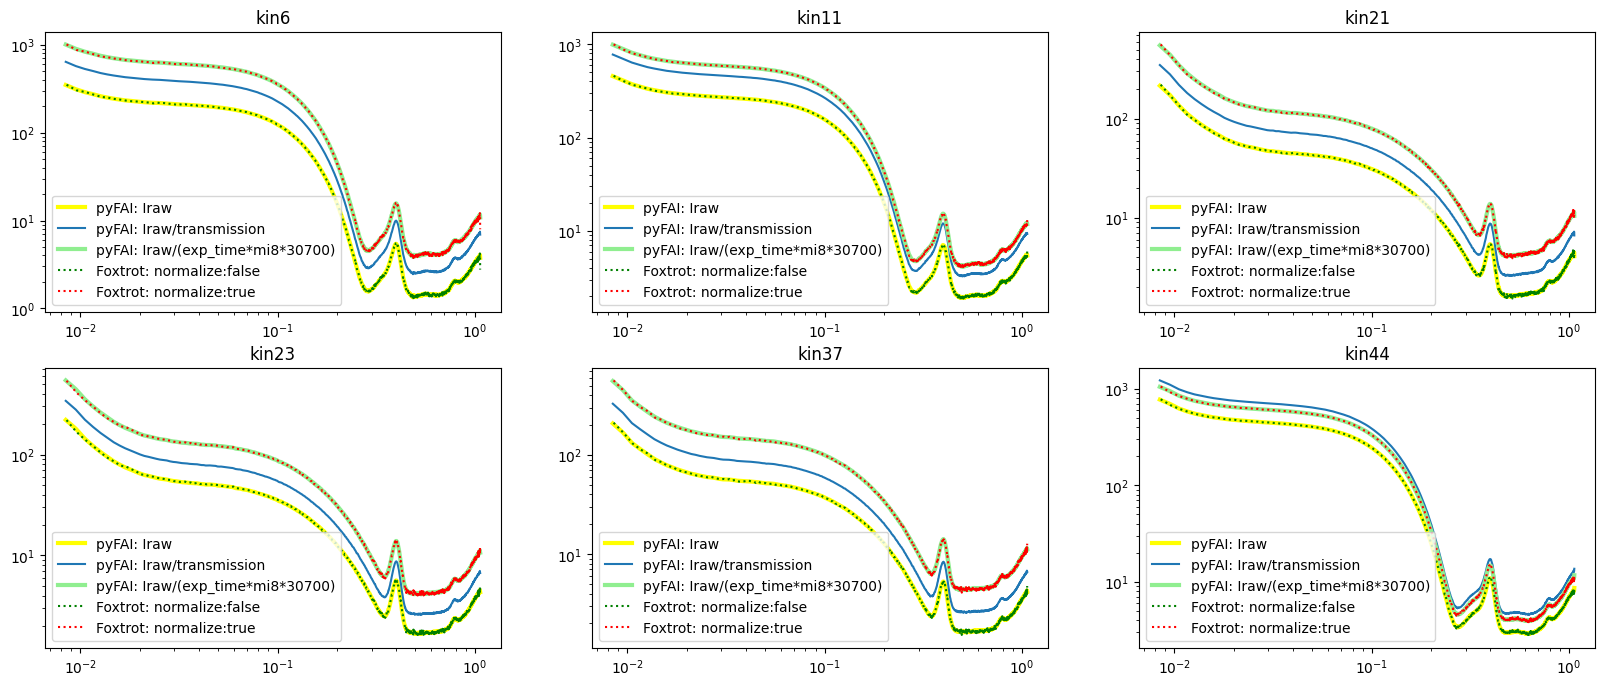

In [4]:
fig,ax = plt.subplots(2,3,figsize=(20,8))
# Iterate over the sample files and plot data for each on a subplot
for index in range(len(files_samples)):
    # Determine the row and column position in the 2x3 grid for the current subplot
    row = index // 3 
    col = index % 3
    # Extract sample parameters from the HDF5 file
    params_S = st.extract_from_h5(files_samples[index])
     # Perform data integration with a mask file and take the mean
    integration = st.integrate(params_S, maskfile, mean=True)
    # Plot the raw intensity on a logarithmic scale
    ax[row, col].loglog(integration["q"],integration["i_raw"],label = 'pyFAI: Iraw',color = 'yellow',linewidth=3)
    # Plot the transmission-corrected intensity on a logarithmic scale
    ax[row, col].loglog(integration["q"],integration["i_corr_T"],label = 'pyFAI: Iraw/transmission') 
    # Plot the intensity corrected for exposure time, MI8 value, and a constant
    ax[row, col].loglog(integration["q"],integration["i_corr_mi8t"],label = 'pyFAI: Iraw/(exp_time*mi8*30700)',color = 'lightgreen',linewidth=3) 
    # Load and plot data processed with Foxtrot (normalization: false)
    q_foxtrot,i_foxtrot = st.load_txt(foxtrot_samples_false[index], skiprows=1)
    ax[row, col].loglog(q_foxtrot,i_foxtrot,label = 'Foxtrot: normalize:false',linestyle = ':',color = 'green')
    # Load and plot data processed with Foxtrot (normalization: true)
    q_foxtrot,i_foxtrot = st.load_txt(foxtrot_samples_true[index], skiprows=1)
    ax[row, col].loglog(q_foxtrot,i_foxtrot,label = 'Foxtrot: normalize:true',linestyle = ':',color = 'red')
    #Add title and legend to graph
    ax[row, col].set_title(kin[index])
    ax[row, col].legend()
    # Calculate the ratio of Foxtrot data to corrected pyFAI data and its standard deviation
    mean_ratio, sigma_ratio = st.ratio(q_foxtrot,i_foxtrot,integration["q"],integration["i_corr_mi8t"])

- References

ratio= 1.000, sigma= 0.018
ratio= 1.000, sigma= 0.016
ratio= 1.002, sigma= 0.019
ratio= 1.004, sigma= 0.023
ratio= 1.008, sigma= 0.026
ratio= 1.001, sigma= 0.013


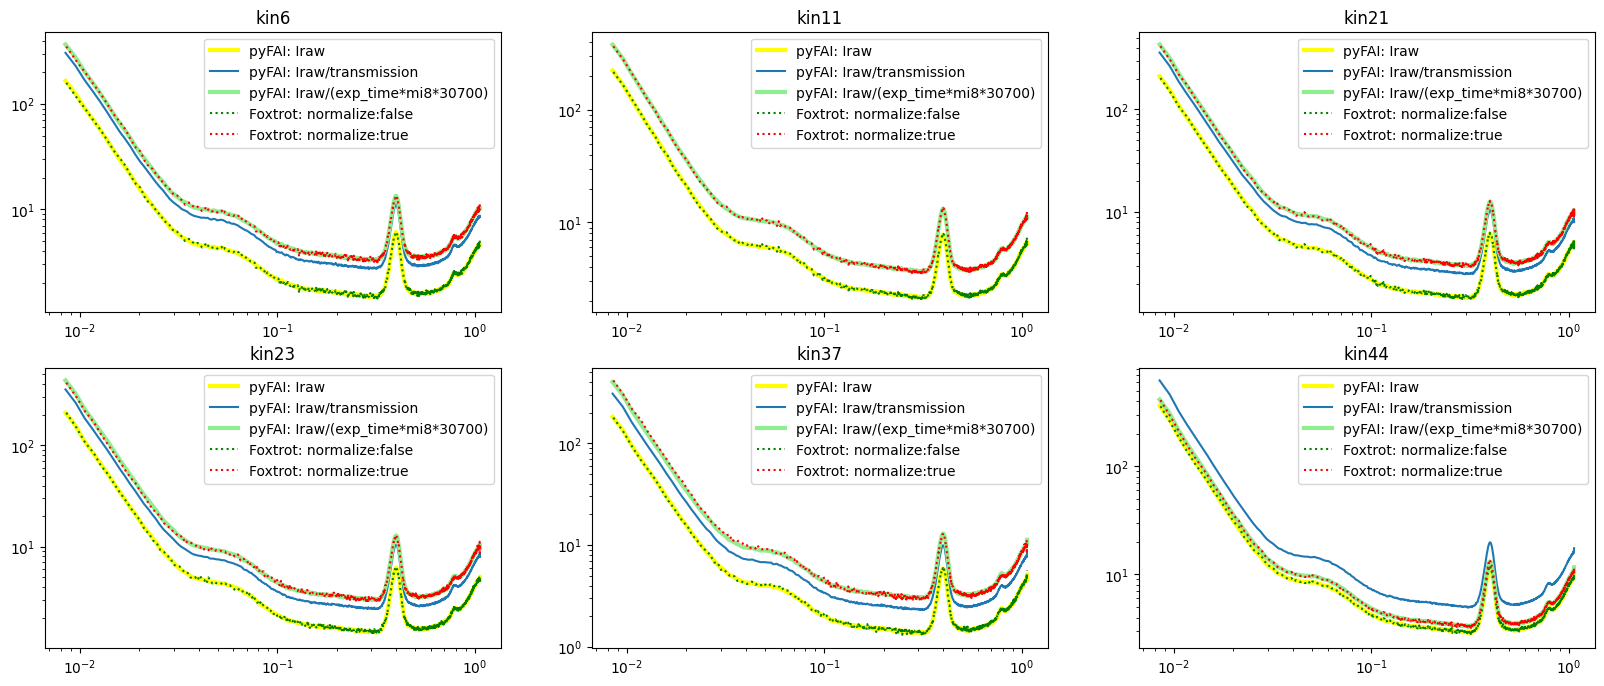

In [5]:
fig,ax = plt.subplots(2,3,figsize=(20,8))
for index in range(len(files_ref)):
    row = index // 3 
    col = index % 3
    params_R = st.extract_from_h5(files_ref[index])
    integration = st.integrate(params_R, maskfile, mean=True)
    ax[row, col].loglog(integration["q"],integration["i_raw"],label = 'pyFAI: Iraw',color = 'yellow',linewidth=3)
    ax[row, col].loglog(integration["q"],integration["i_corr_T"]/transmission,label = 'pyFAI: Iraw/transmission') 
    ax[row, col].loglog(integration["q"],integration["i_corr_mi8t"],label = 'pyFAI: Iraw/(exp_time*mi8*30700)',color = 'lightgreen',linewidth=3) 
    q_foxtrot,i_foxtrot = st.load_txt(foxtrot_refs_false[index], skiprows=1)
    ax[row, col].loglog(q_foxtrot,i_foxtrot,label = 'Foxtrot: normalize:false',linestyle = ':',color = 'green')
    q_foxtrot,i_foxtrot = st.load_txt(foxtrot_refs_true[index], skiprows=1)
    ax[row, col].loglog(q_foxtrot,i_foxtrot,label = 'Foxtrot: normalize:true',linestyle = ':',color = 'red')
    ax[row, col].set_title(kin[index])
    ax[row, col].legend()
    mean_ratio, sigma_ratio = st.ratio(q_foxtrot,i_foxtrot,integration["q"],integration["i_corr_mi8t"])

La bonne correction est donc: $ i_{\text{corr}} = \frac{i}{\text{averagemi8b} \times \text{exposure\_time} \times 30700} $

- Soustraction des courbes corrigées

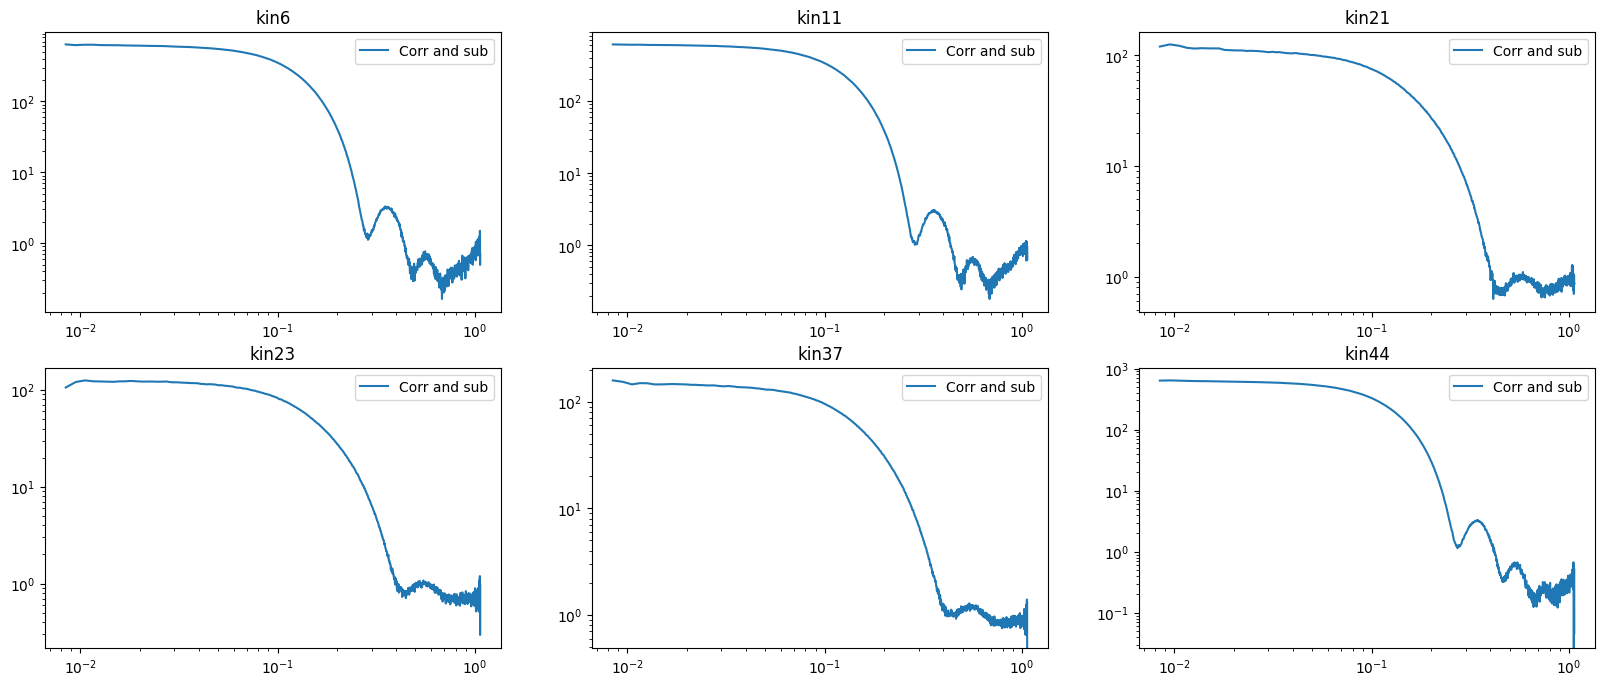

In [6]:
fig,ax = plt.subplots(2,3,figsize=(20,8))
# Iterate through all sample files for plotting
for index in range(len(files_samples)):
    # Determine the row and column position in the 2x3 grid for the current subplot
    row = index // 3 
    col = index % 3
    # Extract sample parameters from the HDF5 file
    params_S = st.extract_from_h5(files_samples[index])
    # Perform integration on the sample data with a mask file, taking the mean
    integration_S = st.integrate(params_S, maskfile, mean=True)
    # Extract the corrected intensity for the sample
    i_S_cor = integration_S["i_corr_mi8t"]
    # Extract reference parameters from the corresponding reference HDF5 file
    params_R = st.extract_from_h5(files_ref[index])
    # Perform integration on the reference data with a mask file, taking the mean
    integration_R = st.integrate(params_R, maskfile, mean=True)
    # Extract the corrected intensity for the reference
    i_R_cor = integration_R["i_corr_mi8t"]
    # Extract the scattering vector (q) values from the reference data
    q = integration_R["q"]
    # Subtract the corrected reference intensity from the corrected sample intensity
    I_sub = i_S_cor - i_R_cor
    # Plot the corrected and subtracted intensity on a logarithmic scale
    ax[row, col].loglog(q,I_sub,label = 'Corr and sub') 
    ax[row, col].set_title(kin[index])
    ax[row, col].legend()

    

- Verif sur kin23 (validé Guillaume)

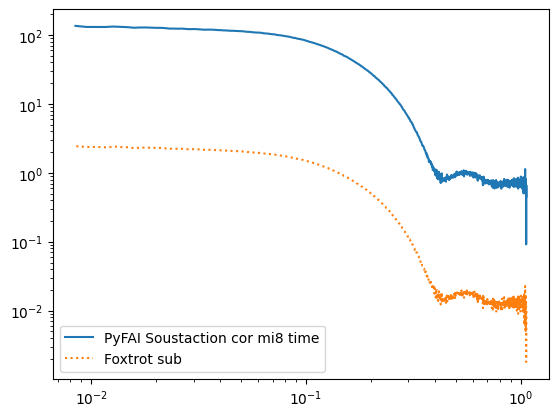

In [7]:
# Define the folder containing the sample and reference HDF5 files
sample_folder = 'D:/SWING/to_do/kin_23_au_125tes_rt/'
# Define the filenames for the sample and reference data
sample_file = 'rodriguez_05734_2024-10-12_16-28-20.h5'  # HDF5 file for the sample
ref_file ='rodriguez_05563_2024-10-12_15-45-12.h5'      # HDF5 file for the reference

# Construct the full path to the sample HDF5 file      
file_path =  os.path.join(sample_folder,sample_file)
# Extract parameters from the sample HDF5 file
params = st.extract_from_h5(file_path, False)
# Integrate the sample data using a mask file and calculate the mean intensity
integration = st.integrate(params,maskfile,mean=True)
# Extract the corrected intensity for the sample (corrected for MI8 and time)
i_corr = integration["i_corr_mi8t"]
# Construct the full path to the reference HDF5 file
file_path =  os.path.join(sample_folder,ref_file)
# Extract parameters from the reference HDF5 file
params = st.extract_from_h5(file_path, False)
# Integrate the reference data using the same mask file and calculate the mean intensity
integration = st.integrate(params,maskfile,mean=True)
# Extract the corrected intensity for the reference
i_corr_ref = integration["i_corr_mi8t"]
# Subtract the corrected reference intensity from the corrected sample intensity
i_sub = i_corr - i_corr_ref
# Define the path to the Foxtrot data file (already pre-subtracted)
foxtrot_path = 'fin_cinetique/S_C_2_SF_3_P_35_05734{0,0}_AzInt_Px_427.dat'
# Load the Foxtrot data file, skipping the first 21 rows (header or metadata)
foxtrot_sub = st.load_txt(foxtrot_path,21)

fig,ax = plt.subplots()
# Plot the PyFAI corrected and subtracted intensity on a logarithmic scale
ax.loglog(q, i_sub, label = 'PyFAI Soustaction cor mi8 time')
# Plot the Foxtrot subtracted data on the same scale with a dashed linestyle
ax.loglog(foxtrot_sub[0],foxtrot_sub[1], label = 'Foxtrot sub',linestyle = ':')
ax.legend()

On a des courbes corrigées equivalentes mais avec un facteur multiplicatif pour passer de l'une à l'autre. Il reste à faire la calibration avec l'hexane

## <u>2 - Calibration avec le plateau de l'hexane</u>

- Calcul intensités plateau hexane hexane calculés dans la feuille excel sld thickness (sld thickness.xls)

Text(0, 0.5, 'Differential Scattering Cross Section')

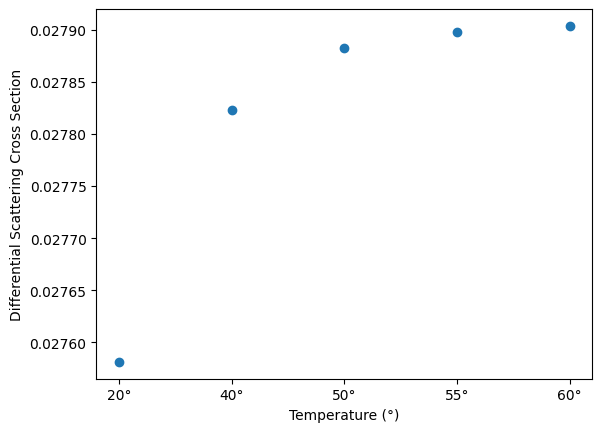

In [8]:
# Define a dictionary containing the differential scattering cross-section values
# Keys represent the temperature in degrees (as strings) and values are the corresponding cross-section values
dif_scat_cross_sec = {"20°":0.027581,"40°":0.027823,"50°":0.027883 ,"55°":0.027898 ,"60°":0.027904}
fig,ax = plt.subplots()
# Plot the data as a scatter plot
# Use the dictionary keys (temperatures) as x-values and dictionary values (cross-section 
ax.scatter(dif_scat_cross_sec.keys(), dif_scat_cross_sec.values())
# Set labels and title
ax.set_xlabel('Temperature (°)')
ax.set_ylabel('Differential Scattering Cross Section')

- Courbes des cellules vides acquises pour:
    - kin1(40°)
    - kin22(40°)
    - kin23(20°)

- Extraire les fichiers des cellules vides et sauver les I(q) dans des fichiers CALIB_mean_i_corr_E.csv

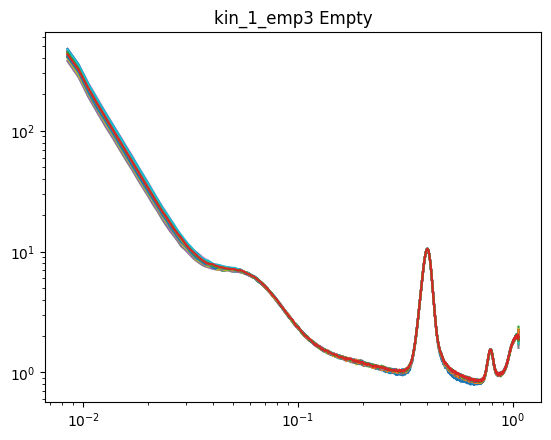

In [9]:
# Define the folder containing the sample data
sample_folder = 'D:/SWING/rodriguez_ref_empty-hexane/kin_1_emp3/'
print(sample_folder)
# Retrieve all filenames in the sample folder that match the measurement type 'K' (shoulbe 'E' but here bad filenames...)
path_starting_with_E = st.get_finenames_by_type(sample_folder,meas_type='K')

header =  "q   i_reference "
fig,ax = plt.subplots()
# Initialize a list to store the corrected intensity values for all files
all_i_corr_mi8t = []
# Iterate over all retrieved files
for index,file in enumerate(path_starting_with_E):
    #Extract and integrate empty files
    params = st.extract_from_h5(file)
    integration = st.integrate(params,maskfile,mean=True)
    q_values = integration['q']
    i_corr_mi8t_values = integration["i_corr_mi8t"]
    all_i_corr_mi8t.append(i_corr_mi8t_values)
    ax.loglog(q_values ,i_corr_mi8t_values)
    print(f"{index} on {len(path_starting_with_E)}" )

    clear_output(wait=True)
    
ax.set_title(f'{sample_folder.split("/")[-2]} Empty')
mean_i_corr_mi8t = np.mean(all_i_corr_mi8t, axis=0)
data = {'q': q_values, 'mean_i_corr_mi8t': mean_i_corr_mi8t}
# Add each iteration's i_corr_mi8t values as a new column
for i, i_corr_values in enumerate(all_i_corr_mi8t):
    data[f'file_{i + 1}'] = i_corr_values
# Create the DataFrame
df = pd.DataFrame(data)
# Save the results to a CSV file
output_file_path = os.path.join(sample_folder, 'CALIB_mean_i_corr_E.csv')
df.to_csv(output_file_path, index=False)

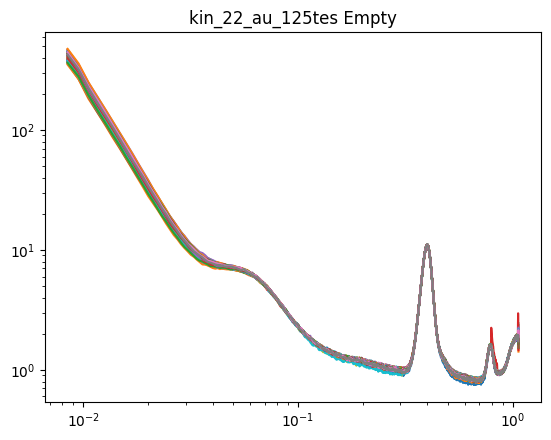

In [10]:
sample_folder = 'D:/SWING/to_do/kin_22_au_125tes/'
# Retrieve all filenames in the sample folder that match the measurement type 'K'
path_starting_with_E = st.get_finenames_by_type(sample_folder,meas_type='E')
header =  "q   i_reference "
fig,ax = plt.subplots()
all_i_corr_mi8t = []
for index,file in enumerate(path_starting_with_E):
    params = st.extract_from_h5(file)
    integration = st.integrate(params,maskfile,mean=True)
    q_values = integration['q']
    i_corr_mi8t_values = integration["i_corr_mi8t"]
    all_i_corr_mi8t.append(i_corr_mi8t_values)
    ax.loglog(q_values ,i_corr_mi8t_values)
    print(f"{index} on {len(path_starting_with_E)}" )

    clear_output(wait=True)
ax.set_title(f'{sample_folder.split("/")[-2]} Empty')
mean_i_corr_mi8t = np.mean(all_i_corr_mi8t, axis=0)
data = {'q': q_values, 'mean_i_corr_mi8t': mean_i_corr_mi8t}
# Add each iteration's i_corr_mi8t values as a new column
for i, i_corr_values in enumerate(all_i_corr_mi8t):
    data[f'file_{i + 1}'] = i_corr_values
# Create the DataFrame
df = pd.DataFrame(data)
# Save the results to a CSV file
output_file_path = os.path.join(sample_folder, 'CALIB_mean_i_corr_E.csv')
df.to_csv(output_file_path, index=False)

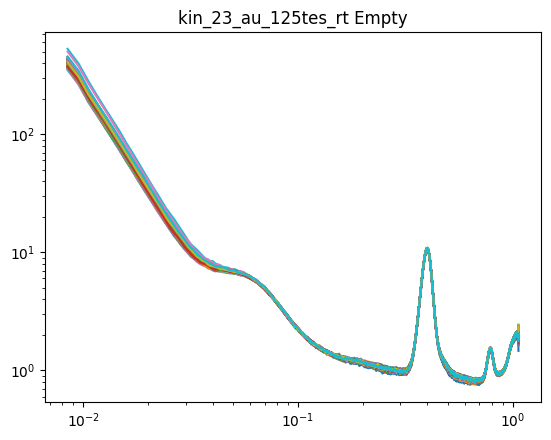

In [11]:
sample_folder = 'D:/SWING/to_do/kin_23_au_125tes_rt/'
path_starting_with_E = st.get_finenames_by_type(sample_folder,meas_type='E')
header =  "q   i_reference "
fig,ax = plt.subplots()
all_i_corr_mi8t = []
for index,file in enumerate(path_starting_with_E):
    params = st.extract_from_h5(file)
    integration = st.integrate(params,maskfile,mean=True)
    q_values = integration['q']
    i_corr_mi8t_values = integration["i_corr_mi8t"]
    all_i_corr_mi8t.append(i_corr_mi8t_values)
    ax.loglog(q_values ,i_corr_mi8t_values)
    print(f"{index} on {len(path_starting_with_E)}" )

    clear_output(wait=True)
ax.set_title(f'{sample_folder.split("/")[-2]} Empty')
mean_i_corr_mi8t = np.mean(all_i_corr_mi8t, axis=0)
data = {'q': q_values, 'mean_i_corr_mi8t': mean_i_corr_mi8t}
# Add each iteration's i_corr_mi8t values as a new column
for i, i_corr_values in enumerate(all_i_corr_mi8t):
    data[f'file_{i + 1}'] = i_corr_values
# Create the DataFrame
df = pd.DataFrame(data)
# Save the results to a CSV file
output_file_path = os.path.join(sample_folder, 'CALIB_mean_i_corr_E.csv')
df.to_csv(output_file_path, index=False)

- Extraire les fichiers des references hexane vides et sauver les I(q) dans des fichiers CALIB_mean_i_corr_R.csv

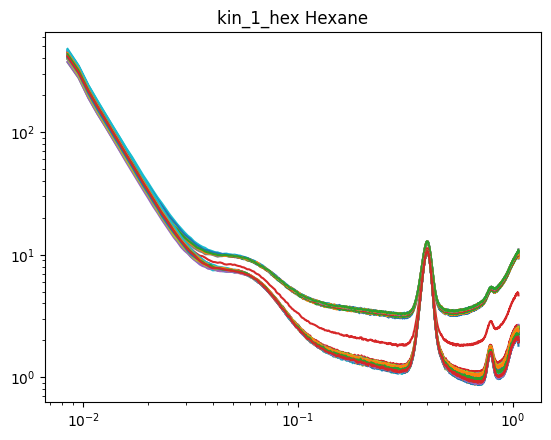

In [12]:
sample_folder = 'D:/SWING/rodriguez_ref_empty-hexane/kin_1_hex/'
maskfile = 'macro_mask/mask_waxs_eiger_ruiz_oct24.edf'
st.create_info_file(sample_folder)
path_starting_with_R = st.get_finenames_by_type(sample_folder,meas_type='K')


header =  "q   i_reference "
fig,ax = plt.subplots()
all_i_corr_mi8t = []
for index,file in enumerate(path_starting_with_R):
    params = st.extract_from_h5(file)
    integration = st.integrate(params,maskfile,mean=True)
    q_values = integration['q']
    i_corr_mi8t_values = integration["i_corr_mi8t"]
    all_i_corr_mi8t.append(i_corr_mi8t_values)
    ax.loglog(q_values ,i_corr_mi8t_values)
    print(f"{index} on {len(path_starting_with_R)}" )
    clear_output(wait=True)
ax.set_title(f'{sample_folder.split("/")[-2]} Hexane')
mean_i_corr_mi8t = np.mean(all_i_corr_mi8t, axis=0)
data = {'q': q_values, 'mean_i_corr_mi8t': mean_i_corr_mi8t}
# Add each iteration's i_corr_mi8t values as a new column
for i, i_corr_values in enumerate(all_i_corr_mi8t):
    data[f'file_{i + 1}'] = i_corr_values
# Create the DataFrame
df = pd.DataFrame(data)
# Save the results to a CSV file
output_file_path = os.path.join(sample_folder, 'CALIB_mean_i_corr_R.csv')
df.to_csv(output_file_path, index=False)

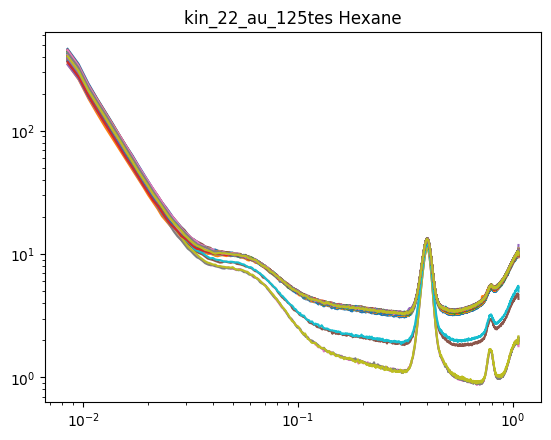

In [13]:
sample_folder = 'D:/SWING/to_do/kin_22_au_125tes/'
maskfile = 'macro_mask/mask_waxs_eiger_ruiz_oct24.edf'
st.create_info_file(sample_folder)
path_starting_with_R = st.get_finenames_by_type(sample_folder,meas_type='R')


header =  "q   i_reference "
fig,ax = plt.subplots()
all_i_corr_mi8t = []
for index,file in enumerate(path_starting_with_R):
    params = st.extract_from_h5(file)
    integration = st.integrate(params,maskfile,mean=True)
    q_values = integration['q']
    i_corr_mi8t_values = integration["i_corr_mi8t"]
    all_i_corr_mi8t.append(i_corr_mi8t_values)
    ax.loglog(q_values ,i_corr_mi8t_values)
    print(f"{index} on {len(path_starting_with_R)}" )
    clear_output(wait=True)
ax.set_title(f'{sample_folder.split("/")[-2]} Hexane')
mean_i_corr_mi8t = np.mean(all_i_corr_mi8t, axis=0)
data = {'q': q_values, 'mean_i_corr_mi8t': mean_i_corr_mi8t}
# Add each iteration's i_corr_mi8t values as a new column
for i, i_corr_values in enumerate(all_i_corr_mi8t):
    data[f'file_{i + 1}'] = i_corr_values
# Create the DataFrame
df = pd.DataFrame(data)
# Save the results to a CSV file
output_file_path = os.path.join(sample_folder, 'CALIB_mean_i_corr_R.csv')
df.to_csv(output_file_path, index=False)

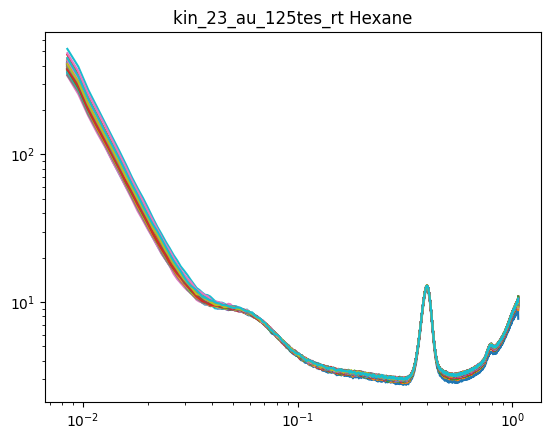

In [14]:
sample_folder = 'D:/SWING/to_do/kin_23_au_125tes_rt/'
maskfile = 'macro_mask/mask_waxs_eiger_ruiz_oct24.edf'
st.create_info_file(sample_folder)
path_starting_with_R = st.get_finenames_by_type(sample_folder,meas_type='R')


header =  "q   i_reference "
fig,ax = plt.subplots()
all_i_corr_mi8t = []
for index,file in enumerate(path_starting_with_R):
    params = st.extract_from_h5(file)
    integration = st.integrate(params,maskfile,mean=True)
    q_values = integration['q']
    i_corr_mi8t_values = integration["i_corr_mi8t"]
    all_i_corr_mi8t.append(i_corr_mi8t_values)
    ax.loglog(q_values ,i_corr_mi8t_values)
    print(f"{index} on {len(path_starting_with_R)}" )
    clear_output(wait=True)
ax.set_title(f'{sample_folder.split("/")[-2]} Hexane')
mean_i_corr_mi8t = np.mean(all_i_corr_mi8t, axis=0)
data = {'q': q_values, 'mean_i_corr_mi8t': mean_i_corr_mi8t}
# Add each iteration's i_corr_mi8t values as a new column
for i, i_corr_values in enumerate(all_i_corr_mi8t):
    data[f'file_{i + 1}'] = i_corr_values
# Create the DataFrame
df = pd.DataFrame(data)
# Save the results to a CSV file
output_file_path = os.path.join(sample_folder, 'CALIB_mean_i_corr_R.csv')
df.to_csv(output_file_path, index=False)

- Le kin23 est le seul avec des hexanes "reproductifs"

In [15]:

dif_scat_cross_sec_T = dif_scat_cross_sec["20°"] 
print(dif_scat_cross_sec_T)
mask_inf = 0.05
mask_sup = 0.34

0.027581


mean plateau = 2.1026114577737225+/-0.06273223762701993


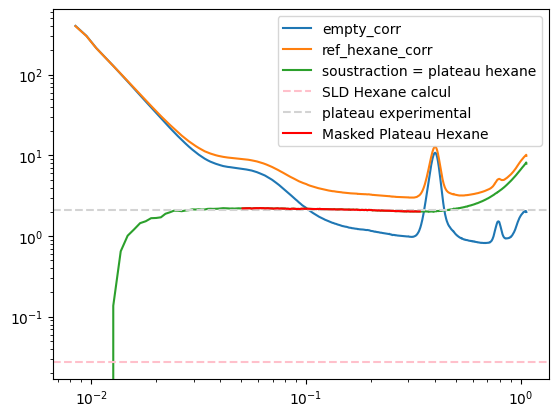

In [16]:
df = pd.read_csv('D:/SWING/to_do/kin_23_au_125tes_rt/CALIB_mean_i_corr_R.csv')
# Extract q values and mean i_corr_mi8t values
q = df['q']
i_R = df['mean_i_corr_mi8t']

df = pd.read_csv('D:/SWING/to_do/kin_23_au_125tes_rt/CALIB_mean_i_corr_E.csv')
# Extract q values and mean i_corr_mi8t values
i_E = df['mean_i_corr_mi8t']

plateau_hexane = i_R - i_E

mask = (q > mask_inf) & (q < mask_sup)
mean_plateau = np.mean(plateau_hexane[mask])
std_plateau = np.std(plateau_hexane[mask])

print(f'mean plateau = {mean_plateau}+/-{std_plateau}')

fig,ax = plt.subplots()
ax.plot(q,i_E, label = 'empty_corr')
ax.loglog(q,i_R, label = 'ref_hexane_corr')
ax.loglog(q,plateau_hexane, label='soustraction = plateau hexane')
ax.axhline(y=dif_scat_cross_sec_T, color='pink', linestyle='--',label = 'SLD Hexane calcul')
ax.axhline(y=mean_plateau, color='lightgrey', linestyle='--',label = 'plateau experimental')

q_masked = q[mask]
plateau_hexane_masked = plateau_hexane[mask]
# Plot the masked values with markers
ax.loglog(q_masked, plateau_hexane_masked, color ='r', label='Masked Plateau Hexane')
ax.legend()

In [17]:
coef = mean_plateau/dif_scat_cross_sec_T

print(coef)
print(1/coef)

76.23405452208848
0.0131174972427874


- verif sur kin23 (validé par Guillaume)

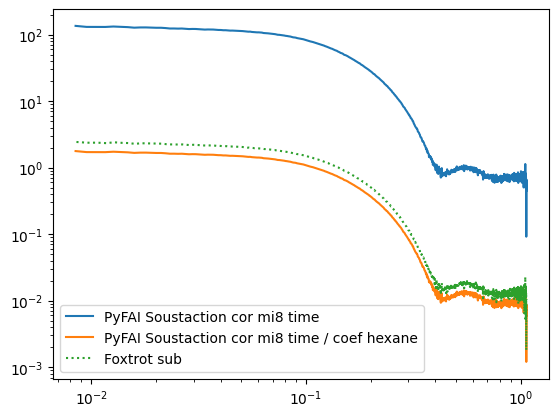

In [18]:
sample_folder = 'D:/SWING/to_do/kin_23_au_125tes_rt/'
sample_file = 'rodriguez_05734_2024-10-12_16-28-20.h5'
ref_file ='rodriguez_05563_2024-10-12_15-45-12.h5'
        
file_path =  os.path.join(sample_folder,sample_file)
params = st.extract_from_h5(file_path, False)
integration = st.integrate(params,maskfile,mean=True)

i_corr = integration["i_corr_mi8t"]

file_path =  os.path.join(sample_folder,ref_file)
params = st.extract_from_h5(file_path, False)
integration = st.integrate(params,maskfile,mean=True)

i_corr_ref = integration["i_corr_mi8t"]

i_sub = i_corr - i_corr_ref

foxtrot_path = 'fin_cinetique/S_C_2_SF_3_P_35_05734{0,0}_AzInt_Px_427.dat'
foxtrot_sub = st.load_txt(foxtrot_path,21)

fig,ax = plt.subplots()
ax.loglog(q, i_sub, label = 'PyFAI Soustaction cor mi8 time')
ax.loglog(q, i_sub/coef, label = 'PyFAI Soustaction cor mi8 time / coef hexane')
ax.loglog(foxtrot_sub[0],foxtrot_sub[1], label = 'Foxtrot sub',linestyle = ':')

ax.legend()

## Correction Hexane

- extraire les données des cellules vides (les mesures sont rares... seulement kin1 kin22 et kin23??)

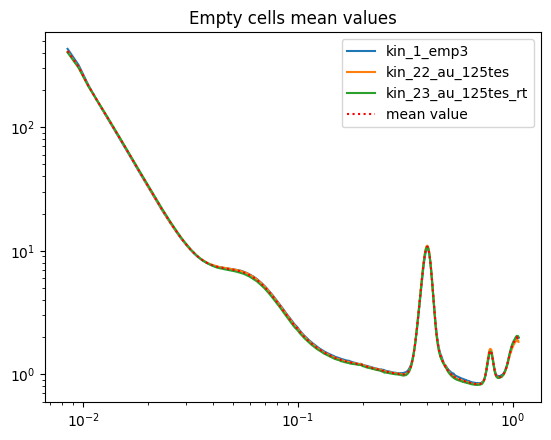

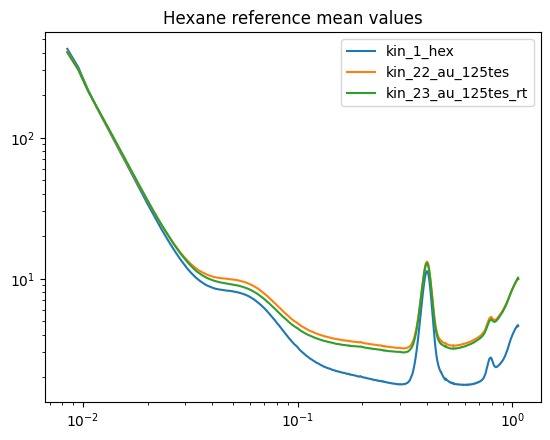

In [19]:
empty_files =  ['D:/SWING/rodriguez_ref_empty-hexane/kin_1_emp3/CALIB_mean_i_corr_E.csv', 'D:/SWING/to_do/kin_22_au_125tes/CALIB_mean_i_corr_E.csv','D:/SWING/to_do/kin_23_au_125tes_rt/CALIB_mean_i_corr_E.csv']
fig,ax = plt.subplots()

mean_i_corr_mi8t_list = []
for output_file_path in empty_files:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(output_file_path)
    # Extract q values and mean i_corr_mi8t values
    q_values = df['q']
    mean_i_corr_mi8t = df['mean_i_corr_mi8t']
    label = str(output_file_path.split('/')[-2])
    mean_i_corr_mi8t_list.append(mean_i_corr_mi8t)
    ax.loglog(q_values,mean_i_corr_mi8t,label = label )
    ax.set_title('Empty cells mean values')
    
mean_i_corr_mi8t_global_empty = np.mean(np.array(mean_i_corr_mi8t_list), axis=0)
ax.loglog(q_values,mean_i_corr_mi8t_global_empty,color = 'r', linestyle=':',label = 'mean value' )
ax.legend()


ref_files = ['D:/SWING/rodriguez_ref_empty-hexane/kin_1_hex/CALIB_mean_i_corr_R.csv', 'D:/SWING/to_do/kin_22_au_125tes/CALIB_mean_i_corr_R.csv','D:/SWING/to_do/kin_23_au_125tes_rt/CALIB_mean_i_corr_R.csv']
fig,ax = plt.subplots()
for output_file_path in ref_files:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(output_file_path)
    # Extract q values and mean i_corr_mi8t values
    q_values = df['q']
    mean_i_corr_mi8t = df['mean_i_corr_mi8t']
    label = str(output_file_path.split('/')[-2])
    ax.loglog(q_values,mean_i_corr_mi8t,label = label )
    ax.set_title('Hexane reference mean values')
    ax.legend()

- Extraire plusieurs hexanes pour verif

In [20]:
sample_folders = [
    'D:/SWING/to_do/kin_6/',
    'D:/SWING/to_do/kin_11_ag_55deg/',
    'D:/SWING/to_do/kin_21_au_500tes/',
    'D:/SWING/to_do/kin_37_au_62tes_s/',
    'D:/SWING/to_do/kin_23_au_125tes_rt/',
    'D:/SWING/to_do/kin_44_ag_80_tes480_s/',
]

- extract reference file and save to csv

In [21]:

# Define a list of sample folders


# Define the mask file path
maskfile = 'macro_mask/mask_waxs_eiger_ruiz_oct24.edf'

# Loop through each folder in the list
for sample_folder in sample_folders:
    # Create the info file for the current sample folder
    st.create_info_file(sample_folder)
    
    # Get filenames starting with 'R'
    path_starting_with_R = st.get_finenames_by_type(sample_folder, meas_type='R')

    header = "q   i_reference "
    all_i_corr_mi8t = []
    
    for index, file in enumerate(path_starting_with_R):
        params = st.extract_from_h5(file)
        integration = st.integrate(params, maskfile, mean=True)
        q_values = integration['q']
        i_corr_mi8t_values = integration["i_corr_mi8t"]
        all_i_corr_mi8t.append(i_corr_mi8t_values)
        ax.loglog(q_values, i_corr_mi8t_values)
        print(f"{index} on {len(path_starting_with_R)} in {sample_folder}")
        clear_output(wait=True)
    
    mean_i_corr_mi8t = np.mean(all_i_corr_mi8t, axis=0)
    
    # Prepare data for DataFrame
    data = {'q': q_values, 'mean_i_corr_mi8t': mean_i_corr_mi8t}
    
    # Add each iteration's i_corr_mi8t values as a new column
    for i, i_corr_values in enumerate(all_i_corr_mi8t):
        data[f'file_{i + 1}'] = i_corr_values

    # Create the DataFrame
    df = pd.DataFrame(data)

    # Save the results to a CSV file
    output_file_path = os.path.join(sample_folder, 'CALIB_mean_i_corr_R.csv')
    df.to_csv(output_file_path, index=False)


19 on 20 in D:/SWING/to_do/kin_44_ag_80_tes480_s/


- plot toutes les refs

D:/SWING/to_do/kin_6/CALIB_mean_i_corr_R.csv


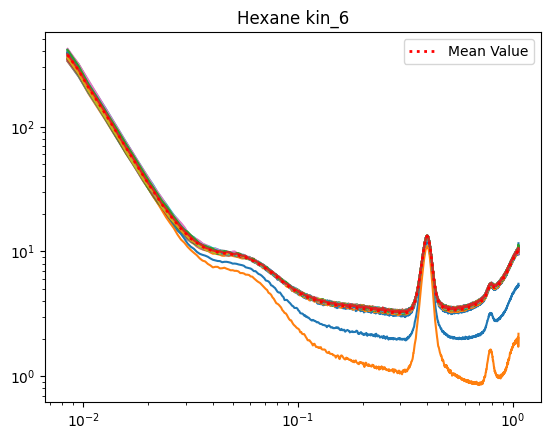

D:/SWING/to_do/kin_11_ag_55deg/CALIB_mean_i_corr_R.csv


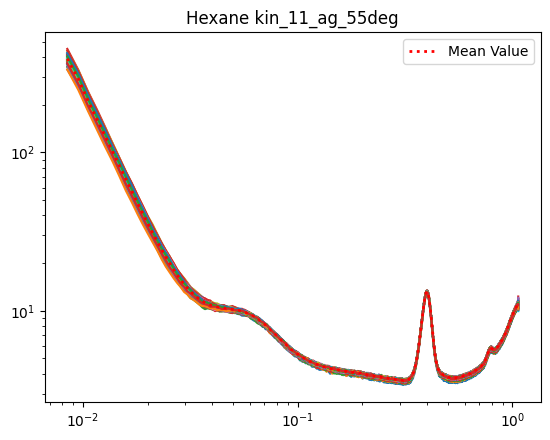

D:/SWING/to_do/kin_21_au_500tes/CALIB_mean_i_corr_R.csv


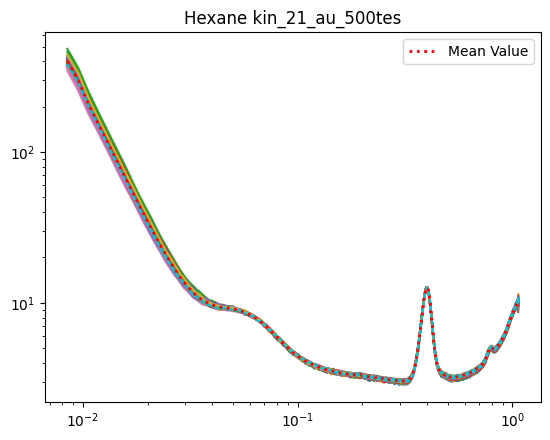

D:/SWING/to_do/kin_37_au_62tes_s/CALIB_mean_i_corr_R.csv


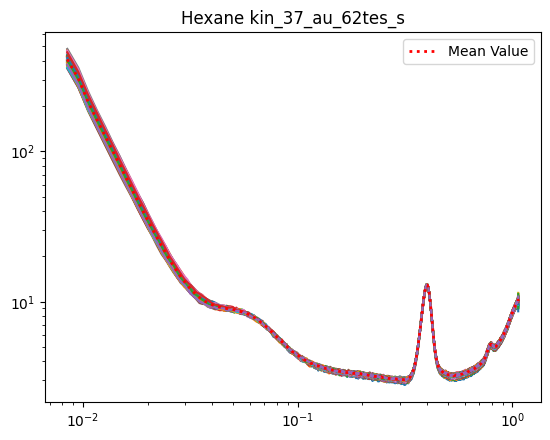

D:/SWING/to_do/kin_23_au_125tes_rt/CALIB_mean_i_corr_R.csv


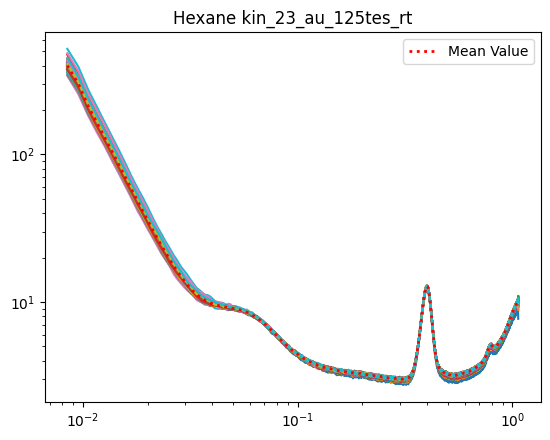

D:/SWING/to_do/kin_44_ag_80_tes480_s/CALIB_mean_i_corr_R.csv


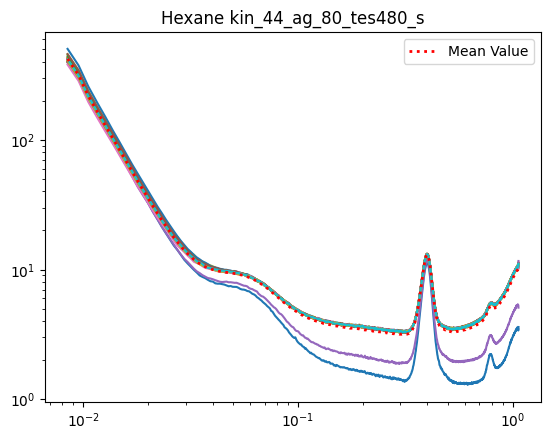

In [22]:

# Loop through each folder in the list to read and plot CSV files
for sample_folder in sample_folders:
    # Construct the expected CSV file path
    output_file_path = os.path.join(sample_folder, 'CALIB_mean_i_corr_R.csv')
    print(output_file_path)
    
    # Check if the file exists
    if os.path.exists(output_file_path):
        # Read the CSV file
        df = pd.read_csv(output_file_path)
        # Extract q values and mean i_corr_mi8t values
        q = df['q']
        i_E = df['mean_i_corr_mi8t']
        # Create a new figure and axes for this CSV file
        fig, ax = plt.subplots()
        # Plot the data
        for column in df.columns[2:]:  # Skip the first two columns (q and mean_i_corr_mi8t)
            ax.loglog(q, df[column])

        ax.loglog(q, i_E, label='Mean Value',color='red',linestyle = ':',linewidth=2)

        ax.legend()
        ax.set_title(f'Hexane {output_file_path.split("/")[-2]}')

        plt.show()

- plot all ref mean values

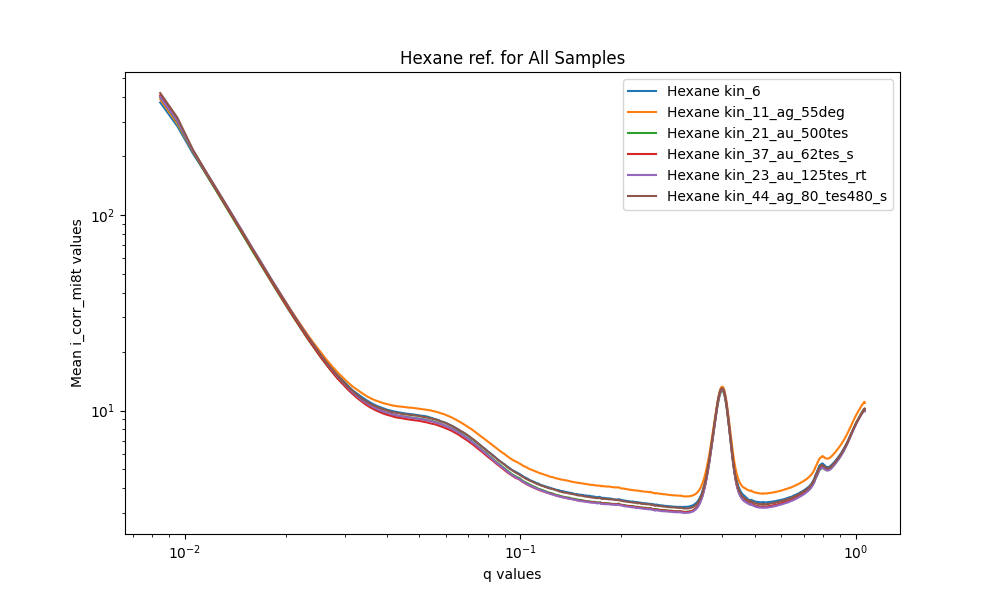

In [23]:
%matplotlib widget
# Initialize a list to store the output file paths for later plotting
output_file_paths = []

# Loop through each folder in the list to collect CSV file paths
for sample_folder in sample_folders:
    # Construct the expected CSV file path
    output_file_path = os.path.join(sample_folder, 'CALIB_mean_i_corr_R.csv')
    
    # Check if the file exists before adding to the list
    if os.path.exists(output_file_path):
        output_file_paths.append(output_file_path)

# Now plot all the results from the saved CSV files
fig, ax = plt.subplots(figsize=(10, 6))

for output_file_path in output_file_paths:
    # Read the CSV file
    df = pd.read_csv(output_file_path)
    
    # Extract q values and mean i_corr_mi8t values
    q = df['q']
    i_S = df['mean_i_corr_mi8t']
    
    # Plot the data
    ax.loglog(q, i_S, label=f'Hexane {output_file_path.split("/")[-2]}')

# Set plot title and labels
ax.set_title('Hexane ref. for All Samples')
ax.set_xlabel('q values')
ax.set_ylabel('Mean i_corr_mi8t values')
ax.legend()


# Show the combined plot
plt.show()

- substract mean value of empy cell

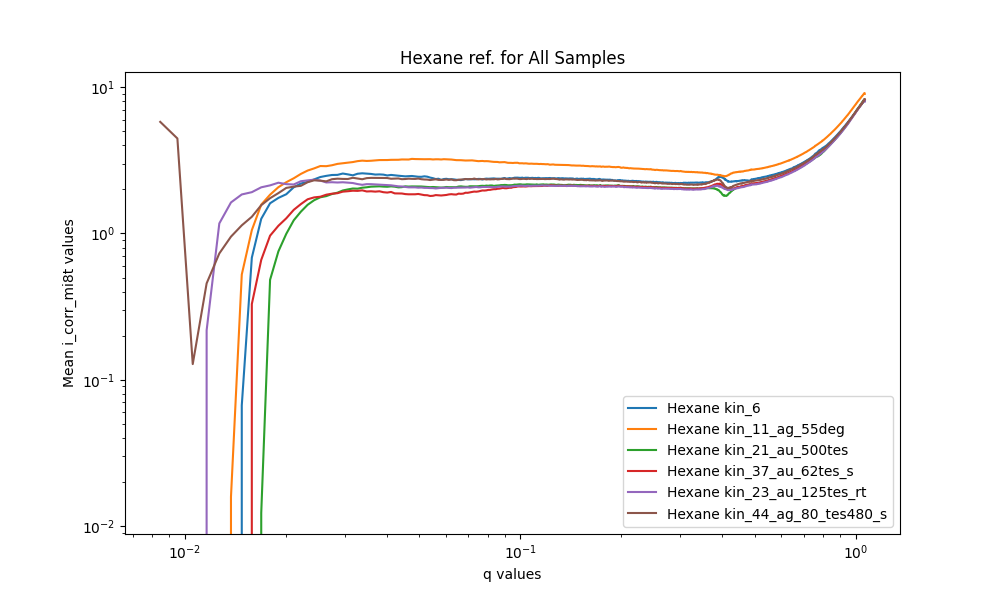

In [24]:
# Initialize a list to store the output file paths for later plotting
output_file_paths = []

# Loop through each folder in the list to collect CSV file paths
for sample_folder in sample_folders:
    # Construct the expected CSV file path
    output_file_path = os.path.join(sample_folder, 'CALIB_mean_i_corr_R.csv')
    
    # Check if the file exists before adding to the list
    if os.path.exists(output_file_path):
        output_file_paths.append(output_file_path)

# Now plot all the results from the saved CSV files
fig, ax = plt.subplots(figsize=(10, 6))

for output_file_path in output_file_paths:
    # Read the CSV file
    df = pd.read_csv(output_file_path)
    
    # Extract q values and mean i_corr_mi8t values
    q = df['q']
    i_S = df['mean_i_corr_mi8t']
    
    # Plot the data
    ax.loglog(q, i_S-mean_i_corr_mi8t_global_empty , label=f'Hexane {output_file_path.split("/")[-2]}')

# Set plot title and labels
ax.set_title('Hexane ref. for All Samples')
ax.set_xlabel('q values')
ax.set_ylabel('Mean i_corr_mi8t values')
ax.legend()

- Determiner le "plateau de l'hexane"

In [25]:
def define_plateau(q,i_R,i_E,dif_scat_cross_sec_T,mask_inf = 0.05,mask_sup = 0.34):
    
    mask_inf = 0.05
    mask_sup = 0.34

    plateau_hexane = i_R - i_E

    mask = (q > mask_inf) & (q < mask_sup)
    mean_plateau = np.mean(plateau_hexane[mask])
    std_plateau = np.std(plateau_hexane[mask])

    print(f'mean plateau = {mean_plateau}+/-{std_plateau}')

    coef = mean_plateau/dif_scat_cross_sec_T
    print(f"coef: {coef}")

    plateau = {'i_plateau':mean_plateau,'std_plateau':std_plateau,'coef':coef}

    return plateau

- calculs des coefs pour differentes temperatures

- 40°C

mean plateau = 2.305754976885645+/-0.06808587712790355
coef: 82.87226312351814


Text(0.5, 1.0, 'kin_6 (40°)')

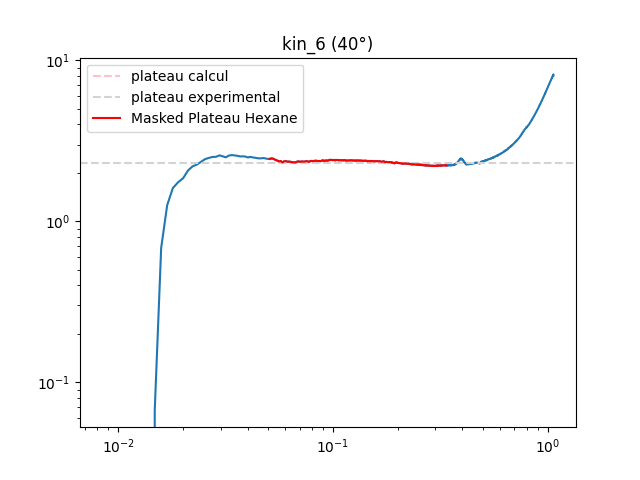

In [26]:

i_E = mean_i_corr_mi8t_global_empty
ref_path = 'D:/SWING/to_do/kin_6/'
file_ref_path = os.path.join(ref_path, 'CALIB_mean_i_corr_R.csv')
df = pd.read_csv(file_ref_path)
q = df['q']
i_R = df['mean_i_corr_mi8t']
plateau_hexane = i_R - i_E
temperature = '40°'
mask_inf = 0.05
mask_sup = 0.34
plateau_kin6 = define_plateau(q,i_R,i_E,dif_scat_cross_sec[temperature],mask_inf,mask_sup)
mean_plateau = plateau_kin6['i_plateau']


fig,ax = plt.subplots()
ax.loglog(q, i_R - i_E)
ax.axhline(y=temperature, color='pink', linestyle='--',label = 'plateau calcul')
ax.axhline(y=mean_plateau, color='lightgrey', linestyle='--',label = 'plateau experimental')
mask = (q > mask_inf) & (q < mask_sup)
q_masked = q[mask]
plateau_hexane_masked = plateau_hexane[mask]
ax.loglog(q_masked, plateau_hexane_masked, color ='r', label='Masked Plateau Hexane')
ax.legend()
ax.set_title(f'{ref_path.split("/")[-2]} ({temperature})')

mean plateau = 2.2699757914841845+/-0.07275491318849123
coef: 81.58630598728334


Text(0.5, 1.0, 'kin_44_ag_80_tes480_s (40°)')

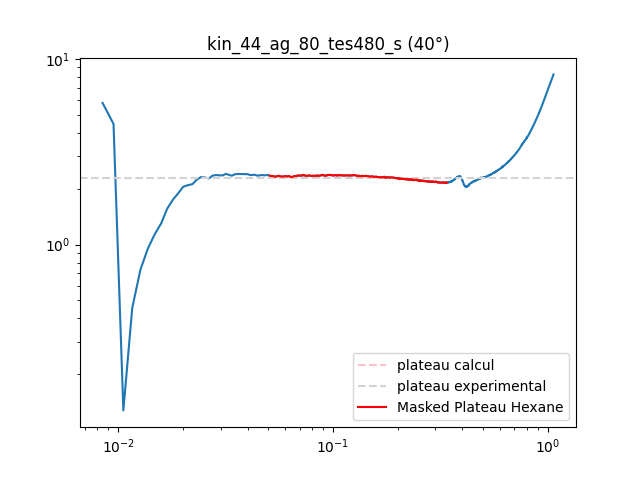

In [27]:
i_E = mean_i_corr_mi8t_global_empty
ref_path = 'D:/SWING/to_do/kin_44_ag_80_tes480_s/'
file_ref_path = os.path.join(ref_path, 'CALIB_mean_i_corr_R.csv')
df = pd.read_csv(file_ref_path)
q = df['q']
i_R = df['mean_i_corr_mi8t']
plateau_hexane = i_R - i_E
temperature = '40°'
mask_inf = 0.05
mask_sup = 0.34
plateau_kin6 = define_plateau(q,i_R,i_E,dif_scat_cross_sec[temperature],mask_inf ,mask_sup)
mean_plateau = plateau_kin6['i_plateau']


fig,ax = plt.subplots()
ax.loglog(q, i_R - i_E)
ax.axhline(y=temperature, color='pink', linestyle='--',label = 'plateau calcul')
ax.axhline(y=mean_plateau, color='lightgrey', linestyle='--',label = 'plateau experimental')

mask = (q > mask_inf) & (q < mask_sup)
q_masked = q[mask]
plateau_hexane_masked = plateau_hexane[mask]
ax.loglog(q_masked, plateau_hexane_masked, color ='r', label='Masked Plateau Hexane')
ax.legend()
ax.set_title(f'{ref_path.split("/")[-2]} ({temperature})')

- 20°C

mean plateau = 2.099526954622871+/-0.04193367250139146
coef: 76.12222017413694


Text(0.5, 1.0, 'kin_21_au_500tes (20°)')

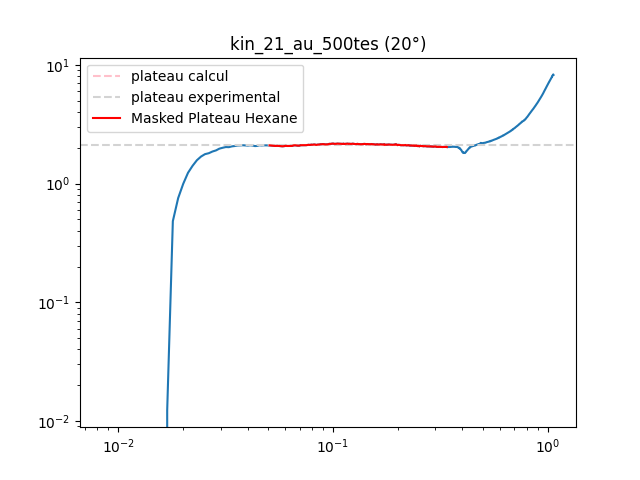

In [28]:
i_E = mean_i_corr_mi8t_global_empty
ref_path = 'D:/SWING/to_do/kin_21_au_500tes/'
file_ref_path = os.path.join(ref_path, 'CALIB_mean_i_corr_R.csv')
df = pd.read_csv(file_ref_path)
q = df['q']
i_R = df['mean_i_corr_mi8t']
plateau_hexane = i_R - i_E
temperature = '20°'
mask_inf = 0.05
mask_sup = 0.34

plateau_kin6 = define_plateau(q,i_R,i_E,dif_scat_cross_sec[temperature],mask_inf,mask_sup)
mean_plateau = plateau_kin6['i_plateau']


fig,ax = plt.subplots()
ax.loglog(q, i_R - i_E)
ax.axhline(y=temperature, color='pink', linestyle='--',label = 'plateau calcul')
ax.axhline(y=mean_plateau, color='lightgrey', linestyle='--',label = 'plateau experimental')
mask = (q > mask_inf) & (q < mask_sup)
q_masked = q[mask]
plateau_hexane_masked = plateau_hexane[mask]
ax.loglog(q_masked, plateau_hexane_masked, color ='r', label='Masked Plateau Hexane')
ax.legend()
ax.set_title(f'{ref_path.split("/")[-2]} ({temperature})')

mean plateau = 2.063027214476886+/-0.04149249761686869
coef: 74.79885480863224


Text(0.5, 1.0, 'kin_23_au_125tes_rt (20°)')

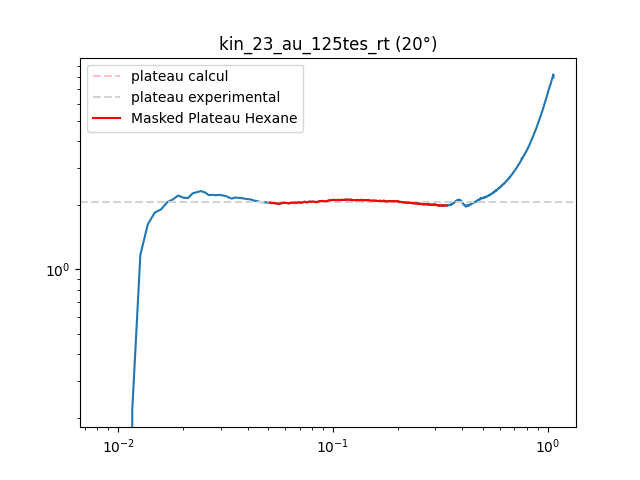

In [29]:
i_E = mean_i_corr_mi8t_global_empty
ref_path = 'D:/SWING/to_do/kin_23_au_125tes_rt/'
file_ref_path = os.path.join(ref_path, 'CALIB_mean_i_corr_R.csv')
df = pd.read_csv(file_ref_path)
q = df['q']
i_R = df['mean_i_corr_mi8t']
plateau_hexane = i_R - i_E
temperature = '20°'
mask_inf = 0.05
mask_sup = 0.34
plateau_kin6 = define_plateau(q,i_R,i_E,dif_scat_cross_sec[temperature],mask_inf = 0.05,mask_sup = 0.34)
mean_plateau = plateau_kin6['i_plateau']


fig,ax = plt.subplots()
ax.loglog(q, i_R - i_E)
ax.axhline(y=temperature, color='pink', linestyle='--',label = 'plateau calcul')
ax.axhline(y=mean_plateau, color='lightgrey', linestyle='--',label = 'plateau experimental')
mask = (q > mask_inf) & (q < mask_sup)
q_masked = q[mask]
plateau_hexane_masked = plateau_hexane[mask]
ax.loglog(q_masked, plateau_hexane_masked, color ='r', label='Masked Plateau Hexane')
ax.legend()
ax.set_title(f'{ref_path.split("/")[-2]} ({temperature})')

mean plateau = 2.0567856341849144+/-0.07183536410672044
coef: 74.57255480892333


Text(0.5, 1.0, 'kin_37_au_62tes_s (20°)')

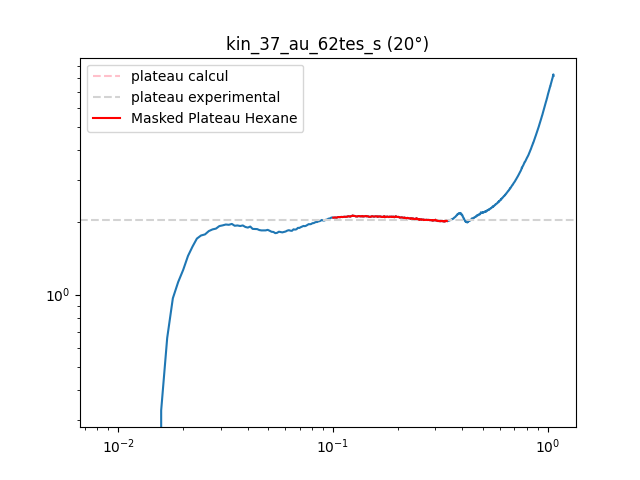

In [30]:
i_E = mean_i_corr_mi8t_global_empty
ref_path = 'D:/SWING/to_do/kin_37_au_62tes_s/'
file_ref_path = os.path.join(ref_path, 'CALIB_mean_i_corr_R.csv')
df = pd.read_csv(file_ref_path)
q = df['q']
i_R = df['mean_i_corr_mi8t']
plateau_hexane = i_R - i_E
temperature = '20°'
#temperature = dif_scat_cross_sec['40°']
mask_inf = 0.1
mask_sup = 0.34
plateau_kin6 = define_plateau(q,i_R,i_E,dif_scat_cross_sec[temperature],mask_inf ,mask_sup)
mean_plateau = plateau_kin6['i_plateau']


fig,ax = plt.subplots()
ax.loglog(q, i_R - i_E)
ax.axhline(y=temperature, color='pink', linestyle='--',label = 'plateau calcul')
ax.axhline(y=mean_plateau, color='lightgrey', linestyle='--',label = 'plateau experimental')
mask = (q > mask_inf) & (q < mask_sup)
q_masked = q[mask]
plateau_hexane_masked = plateau_hexane[mask]
ax.loglog(q_masked, plateau_hexane_masked, color ='r', label='Masked Plateau Hexane')
ax.legend()
ax.set_title(f'{ref_path.split("/")[-2]} ({temperature})')

- 55°C

mean plateau = 2.8511111484184917+/-0.1688480686285853
coef: 102.19768974186292


Text(0.5, 1.0, 'kin_11_ag_55deg (55°)')

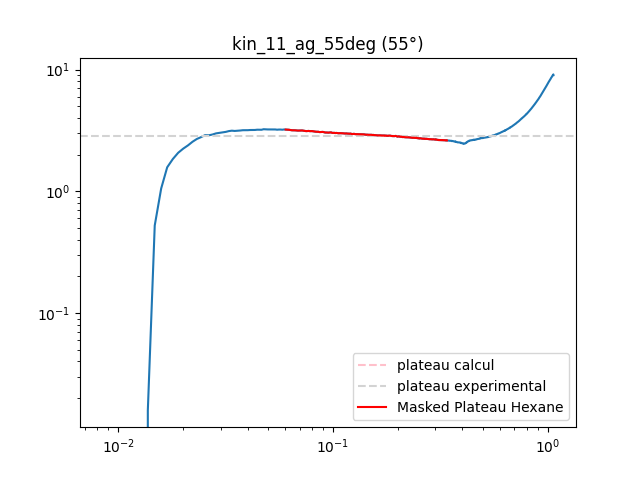

In [31]:
i_E = mean_i_corr_mi8t_global_empty
ref_path = 'D:/SWING/to_do/kin_11_ag_55deg/'
file_ref_path = os.path.join(ref_path, 'CALIB_mean_i_corr_R.csv')
df = pd.read_csv(file_ref_path)
q = df['q']
i_R = df['mean_i_corr_mi8t']
plateau_hexane = i_R - i_E
temperature = '55°'
#temperature = dif_scat_cross_sec['40°']
mask_inf = 0.06
mask_sup = 0.34
plateau_kin6 = define_plateau(q,i_R,i_E,dif_scat_cross_sec[temperature],mask_inf ,mask_sup)
mean_plateau = plateau_kin6['i_plateau']

fig,ax = plt.subplots()
ax.loglog(q, i_R - i_E)
ax.axhline(y=temperature, color='pink', linestyle='--',label = 'plateau calcul')
ax.axhline(y=mean_plateau, color='lightgrey', linestyle='--',label = 'plateau experimental')
mask = (q > mask_inf) & (q < mask_sup)
q_masked = q[mask]
plateau_hexane_masked = plateau_hexane[mask]
ax.loglog(q_masked, plateau_hexane_masked, color ='r', label='Masked Plateau Hexane')
ax.legend()
ax.set_title(f'{ref_path.split("/")[-2]} ({temperature})')

- Verification sur Kin 23 validé par Guillaume

In [32]:
coef_20 = np.array([76.12222017413694,74.79885480863224,74.57255480892333])
coef_20 = np.mean(coef_20)
print(coef_20)

75.1645432638975


In [33]:
q,i = st.load_txt('D:/SWING/to_do/kin_23_au_125tes_rt/integrations/rodriguez_05734_2024-10-12_16-28-20.txt', skiprows=1)

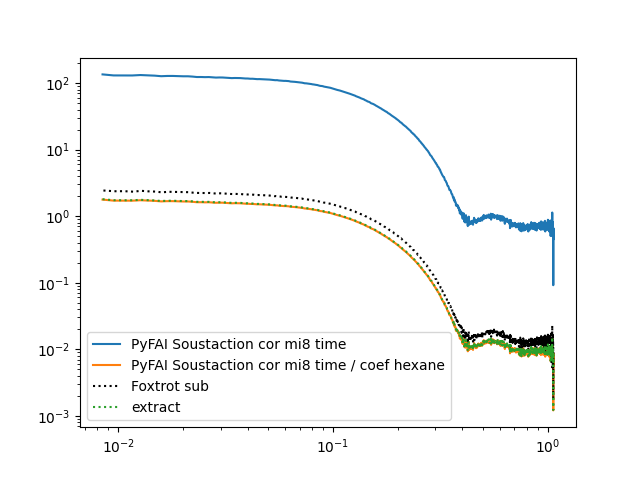

In [34]:
sample_folder = 'D:/SWING/to_do/kin_23_au_125tes_rt/'
sample_file = 'rodriguez_05734_2024-10-12_16-28-20.h5'
ref_file ='rodriguez_05563_2024-10-12_15-45-12.h5'


        
file_path =  os.path.join(sample_folder,sample_file)
params = st.extract_from_h5(file_path, False)
integration = st.integrate(params,maskfile,mean=True)

i_corr = integration["i_corr_mi8t"]
#transmission = np.mean(params['transmission'])
#i_corr = i/transmission


file_path =  os.path.join(sample_folder,ref_file)
params = st.extract_from_h5(file_path, False)
integration = st.integrate(params,maskfile,mean=True)

i_corr_ref = integration["i_corr_mi8t"]
#transmission = np.mean(params['transmission'])
#i_corr_ref = i/transmission

i_sub = i_corr - i_corr_ref

foxtrot_path = 'fin_cinetique/S_C_2_SF_3_P_35_05734{0,0}_AzInt_Px_427.dat'
foxtrot_sub = st.load_txt(foxtrot_path,21)

fig,ax = plt.subplots()
# ax.loglog(q, i,label = 'PyFAI sample raw')
# ax.loglog(q, i_corr,label = 'PyFAI sample cor mi8 time')
# ax.loglog(q, i_corr_ref,label = 'PyFAI ref cor mi8 time')
ax.loglog(q, i_sub, label = 'PyFAI Soustaction cor mi8 time')
ax.loglog(q, i_sub/coef, label = 'PyFAI Soustaction cor mi8 time / coef hexane')
ax.loglog(foxtrot_sub[0],foxtrot_sub[1], label = 'Foxtrot sub',linestyle = ':',color='black')

ax.loglog(q, i, label = 'extract',linestyle=':')



ax.legend()